In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
root = "/Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/"
df_full=pd.read_excel(root + 'external data/Atkinson et al 2018/Supplemental_Table_S3.xlsx',header=2)
df_full.head()

/Users/bencekover/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,gene_ID,start,end,strand,chr,ratio_rrp6,ratio_rrp6D,ratio_rrp6D.rRNAD,ratio_dis3.54,ratio_ago1,...,RPKM_m8h.1,RPKM_m8h.2,CUT,XUT,DUT,Eser et al. data,Wery et al. data,Eser method on rrp6 data,Eser method on exo2 data,Eser method on dcr1 data
0,SPAC212.11,1,5662,-,1,-0.58,0.68,1.60,0.88,0.32,...,0.30,0.34,0,0,0,0,NaN,1,1,1
1,SPNCRNA.2000,346,1164,+,1,-0.22,1.60,2.27,2.43,-0.69,...,0.52,0.53,0,1,0,0,NaN,0,1,0
2,SPNCRNA.2001,2118,2347,+,1,-1.22,2.34,-1.21,1.48,-0.95,...,0.28,0.52,1,0,0,0,NaN,0,0,0
3,SPNCRNA.2002,2448,2760,+,1,-0.81,0.04,1.58,1.23,-0.39,...,0.07,0.19,0,0,0,0,NaN,0,0,0
4,SPNCRNA.2003,4057,4311,+,1,-1.39,0.12,0.29,0.46,-1.53,...,NaN,0.16,0,0,0,0,NaN,0,0,0


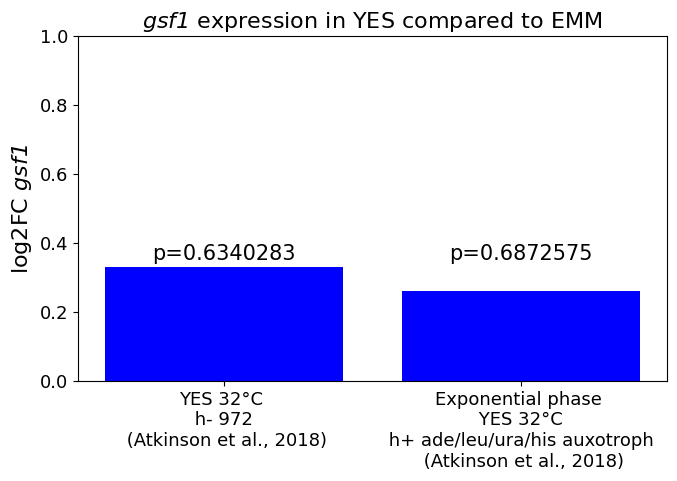

In [3]:
#make a function that plots only YE and YEF and write the pvalue above the bars
#keep only first row, remove first 5 columns

index = df_full[df_full['gene_ID'] == 'SPBC15D4.02'].index
df=df_full.iloc[index,5:]

#show all columns
pd.set_option('display.max_columns', None)
#only keep columns that start with ratio or pval
df=df.filter(regex='ratio|pval')
#recreate the df by having a column for condition, one for ratio and one for pval
df=pd.melt(df,var_name='measurement',value_name='value')
#split the condition column into two columns
#split measurement to type and condition at _
df[['type','condition']]=df.measurement.str.split('_',expand=True)

#rearrange df such that ratio and pval become columns instead of values in type
df_=df.pivot_table(index=['condition'],columns='type',values='value')
#find index of rows with m0h m2h m4h m6h and m8h, then pout these rows at the start
indices = [df_.index.get_loc(c) for c in ['m0h','m2h','m4h','m6h','m8h']]
#save these rows
df__=df_.iloc[indices]
#drop these rows
df_=df_.drop(df_.index[indices])
#concatenate the two dfs
df_=pd.concat([df__,df_])
#df only retain measurements with YE in anme
df_=df_[df_.index.str.contains('YE')]
plt.rcParams.update({'font.size': 13})
#rename YEF to Exponentially proliferating cells; YES 32°C rep 2
df_.index=df_.index.str.replace('YEF','Exponential phase \n YSS 32°C \n h+ ade/leu/ura/his auxotroph \n (Atkinson et al., 2018)')
#rename the value where it is only YE and not more, to Exponentially proliferating cells; YES 32°C rep 1
df_.index=df_.index.str.replace('YE','YES 32°C \n h- 972 \n (Atkinson et al., 2018)')
#change yss to YES
df_.index=df_.index.str.replace('YSS','YES')




fig, ax = plt.subplots(figsize=(7,5))
ax.bar(df_.index,df_['ratio'],color=np.where(df_['pval']<(0.05/len(df_['pval'])),'red','blue'))

ax.set_xlabel('')
#write p value above bars
for i in range(len(df_['pval'])):
      ax.text(i,0.35,'p='+str(df_['pval'][i]),horizontalalignment='center',fontsize=15)
#set ylim to 0.45
ax.set_ylim(0,1)
#y axis log2 FC
ax.set_ylabel( r'$\mathrm{log2FC}$' +' gsf1', fontsize=16, fontstyle='italic')
#title gsf1 expression in YES compared to EMM
ax.set_title('gsf1 ' + r'$\mathrm{expression\ in\ YES\ compared\ to\ EMM}$', fontsize=16, fontstyle='italic')
plt.tight_layout()
#save as svg and png
fig.savefig(root + 'Figures/All figures/gsf1_yes_emm.svg', format='svg',dpi=400)
fig.savefig(root + 'Figures/All figures/gsf1_yes_emm.png', format='png',dpi=400)

In [4]:
%load_ext watermark
%watermark


Last updated: 2023-11-04T15:29:09.583002+00:00

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 7.31.1

Compiler    : Clang 11.0.0 
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [5]:
%watermark --iversions



numpy     : 1.23.4
pandas    : 1.4.4
matplotlib: 3.8.0

